In [1]:
"""import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Load and prepare data
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # Use one feature (BMI)
y = diabetes.target

# Standardize the data (important for gradient descent)
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Initialize parameters with small random values
np.random.seed(42)
m = np.random.randn()
b = np.random.randn()

# Hyperparameters
learning_rate = 0.1  # Reduced learning rate
epochs = 1000
n = len(X)

# Store parameter history
all_b = []
all_m = []
cost_history = []

for i in range(epochs):
    # Calculate predictions
    y_pred = m * X + b

    # Calculate error
    error = y - y_pred

    # Calculate gradients (averaged over all samples)
    slope_m = (-2/n) * np.dot(X.T, error)
    slope_b = (-2/n) * np.sum(error)

    # Update parameters
    m -= learning_rate * slope_m
    b -= learning_rate * slope_b

    # Store parameters
    all_b.append(b)
    all_m.append(m)

    # Calculate and store cost (MSE)
    cost = np.mean(error**2)
    cost_history.append(cost)

    # Early stopping if cost stops decreasing
    if i > 10 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
        break

# Final parameters (denormalized)
m_final = m * (np.std(y)/np.std(X))
b_final = np.mean(y) - m_final * np.mean(X)

print(f"Final slope (m): {m_final}")
print(f"Final intercept (b): {b_final}")


Final slope (m): 0.5859204267357255
Final intercept (b): -1.5231077138727665e-16


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Load and prepare data
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # Use BMI feature
y = diabetes.target

# Standardize the data
X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)
X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m, b = np.random.randn(), np.random.randn()
    n = len(X)
    cost_history = []

    for _ in range(epochs):
        y_pred = m * X + b
        error = y - y_pred

        # Calculate gradients
        slope_m = (-2/n) * np.dot(X.T, error)
        slope_b = (-2/n) * np.sum(error)

        # Update parameters
        m -= learning_rate * slope_m
        b -= learning_rate * slope_b

        # Calculate and store cost
        cost = np.mean(error**2)
        cost_history.append(cost)

        # Early stopping
        if len(cost_history) > 10 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break

    # Denormalize parameters
    m_denorm = m * (y_std/X_std)
    b_denorm = y_mean - m_denorm * X_mean

    return m_denorm, b_denorm, cost_history

# Run gradient descent
gd_m, gd_b, _ = gradient_descent(X_normalized, y_normalized)

# Fit with sklearn for comparison
lr = LinearRegression()
lr.fit(X_normalized.reshape(-1, 1), y_normalized)
sk_m = lr.coef_[0] * (y_std/X_std)
sk_b = y_mean - sk_m * X_mean

# Print results
print("Gradient Descent Results:")
print(f"Slope (m): {gd_m:.6f}")
print(f"Intercept (b): {gd_b:.6f}\n")

Gradient Descent Results:
Slope (m): 949.498099
Intercept (b): 152.133484



In [3]:
print("Scikit-learn Results:")
print(f"Slope (m): {sk_m:.6f}")
print(f"Intercept (b): {lr.intercept_ * y_std + y_mean:.6f}")

Scikit-learn Results:
Slope (m): 949.435260
Intercept (b): 152.133484


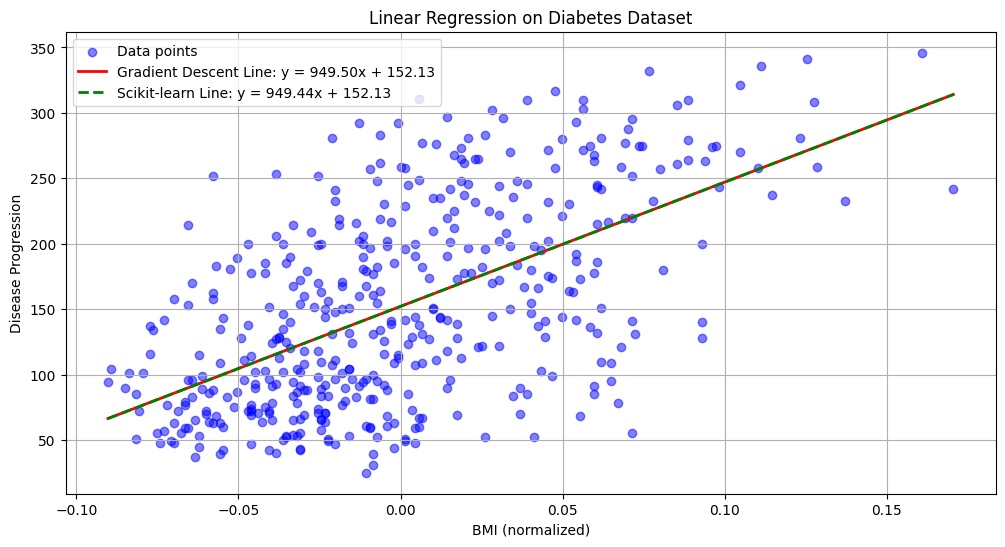

In [4]:
# Create plot
plt.figure(figsize=(12, 6))

# Plot the data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

# Plot gradient descent regression line
x_values = np.array([np.min(X), np.max(X)])
y_values_gd = gd_m * x_values + gd_b
plt.plot(x_values, y_values_gd, color='red', linewidth=2,
         label=f'Gradient Descent Line: y = {gd_m:.2f}x + {gd_b:.2f}')

# Plot sklearn regression line
y_values_sk = sk_m * x_values + sk_b
plt.plot(x_values, y_values_sk, color='green', linestyle='--', linewidth=2,
         label=f'Scikit-learn Line: y = {sk_m:.2f}x + {sk_b:.2f}')

# Add labels and legend
plt.xlabel('BMI (normalized)')
plt.ylabel('Disease Progression')
plt.title('Linear Regression on Diabetes Dataset')
plt.legend()
plt.grid(True)

# Show plot
plt.show()